In [4]:
import pickle
import os
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

os.chdir('./')              	# location where files are stored (main + utility)
save_loc = './results'    			# location to save results
data_loc = './data/'              # location of dataset
results_AE_SHAP, history_AE_SHAP = pickle.load(open("{}/data_1.pkl".format(save_loc), "rb"))
data_kdd = pickle.load(open("{}/data_nsl.pkl".format(save_loc), "rb"))
results_model = pickle.load(open("{}/data_0.pkl".format(save_loc), "rb"))
model = pickle.load(open("{}/model.pkl".format(save_loc), "rb"))

Starting PCA analysis...


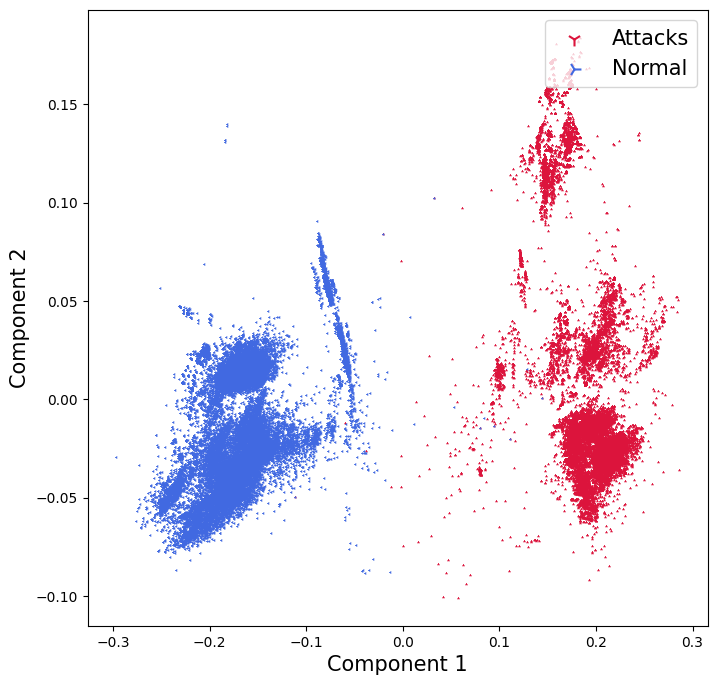

In [5]:
try:
    res_pca = pickle.load(open("{}/data_2.pkl".format(save_loc), "rb"))
except:
    pass
print("Starting PCA analysis...")
res_pca = {} # create object to store results of our PCA analysis

# first, transform SHAP data from training set into PCA space
res_pca['model_SHAP'] = PCA(n_components=10)                                   # create PCA object to represent the SHAP data
res_pca['SHAP_train'] = res_pca['model_SHAP'].fit_transform(results_AE_SHAP['shap_train'])    # fit PCA to the SHAP training data
# res_pca.model_SHAP.explained_variance_ratio_.cumsum()


# now plot the first 2 PCA components fitted to the SHAP training data
fig = plt.figure(figsize=(8,8))
plt.scatter(res_pca['SHAP_train'][data_kdd['train_attack_locs'],0], res_pca['SHAP_train'][data_kdd['train_attack_locs'],1], marker='1', s=1, c='crimson', label='Attacks')   # plot the attacks in red
plt.scatter(res_pca['SHAP_train'][data_kdd['train_normal_locs'],0], res_pca['SHAP_train'][data_kdd['train_normal_locs'],1], marker='4', s=1, c='royalblue', label='Normal')   # plot the normal traffic in blue
# plt.title('PCA Applied to SHAP values of the NSL-KDD Training Dataset')
plt.xlabel('Component 1', fontsize=15)
plt.ylabel('Component 2', fontsize=15)

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legend_handles[0]._sizes = [100]
lgnd.legend_handles[1]._sizes = [100]

plt.show()

In [12]:

# Exibe todas as métricas disponíveis
for key, value in results_model.items():
    print(f"{key}:")
    print(value)
    print("-" * 40)

# Exemplo: acessar métricas específicas
print("Acurácia no treino:", results_model['performance_model_train']['ACCURACY'].values[0])
print("Acurácia no teste:", results_model['performance_model_test']['ACCURACY'].values[0])
print("TPR novos ataques:", results_model.get('TPR_new_attacks', 'N/A'))
print("TPR novos ataques overall:", results_model.get('TPR_new_attacks_overall', 'N/A'))

y_pred_train:
[0 0 1 ... 0 1 0]
----------------------------------------
y_pred_test:
[1 1 0 ... 1 0 1]
----------------------------------------
y_pred_test_21:
[0 0 1 ... 0 1 0]
----------------------------------------
performance_model_train:
        TN   FP   FN       TP  ACCURACY    RECALL  PRECISION        F1  \
0  67337.0  6.0  5.0  58625.0  0.999913  0.999915   0.999898  0.999906   

        FPR       TNR       FNR   T-SCORE  
0  0.000089  0.999911  0.000085  0.999812  
----------------------------------------
performance_model_test:
       TN     FP      FN      TP  ACCURACY    RECALL  PRECISION        F1  \
0  9434.0  277.0  4413.0  8420.0  0.791962  0.656121    0.96815  0.782164   

        FPR       TNR       FNR   T-SCORE  
0  0.028524  0.971476  0.343879  0.642258  
----------------------------------------
performance_model_test_21:
       TN     FP      FN      TP  ACCURACY    RECALL  PRECISION        F1  \
0  1880.0  272.0  4413.0  5285.0  0.604641  0.544958   0.951053  

In [13]:
# Exibe todas as métricas e arrays principais do results_AE_SHAP
for key, value in results_AE_SHAP.items():
    print(f"{key}:")
    # Para arrays grandes, mostra apenas o tipo e shape
    if hasattr(value, 'shape'):
        print(f"Array shape: {value.shape}")
    elif isinstance(value, dict):
        print(f"Dict com chaves: {list(value.keys())}")
    else:
        print(value)
    print("-" * 40)

# Exemplo: acessar métricas específicas se existirem
if 'performance_new_attacks' in results_AE_SHAP:
    print("Performance AE (novos ataques):")
    print(results_AE_SHAP['performance_new_attacks'])
if 'performance_overall' in results_AE_SHAP:
    print("Performance AE (overall):")
    print(results_AE_SHAP['performance_overall'])

shap_train:
Array shape: (125973, 41)
----------------------------------------
shap_test:
Array shape: (22544, 41)
----------------------------------------
scaler:
MinMaxScaler(feature_range=(-1, 1))
----------------------------------------
shap_train_scaled:
Array shape: (125973, 41)
----------------------------------------
shap_test_scaled:
Array shape: (22544, 41)
----------------------------------------
x_data:
Array shape: (100778, 41)
----------------------------------------
val_data:
Array shape: (25195, 41)
----------------------------------------
parameters:
Dict com chaves: ['dense_1_units', 'dense_1_activation', 'dense_2_units', 'dense_2_activation', 'dense_3_units', 'dense_3_activation', 'dense_4_units', 'dense_4_activation', 'dense_5_units', 'dense_5_activation', 'dense_6_units', 'dense_6_activation']
----------------------------------------
grid_search:
[[0.33309125900268555, 0.3148382008075714, [1456, 724, 14, 632, 1644, 41], ['relu', 'relu', 'relu', 'relu', 'relu', 'tan